In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv('Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
scaler  = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [71]:
wcss = []
cluster = []
k_value = range(1,15)
for i in k_value:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaler)
    cluster.append(kmeans)
    wcss.append(kmeans.inertia_)
wcss

[399.99999999999994,
 276.41578815565794,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 57.381747460227864,
 44.86475569922557,
 37.19454682305569,
 35.568718142502924,
 32.391418973960945,
 27.426632622709594,
 23.689172532896098,
 22.99456334338746,
 20.75419059346744]

In [73]:
cluster

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14)]

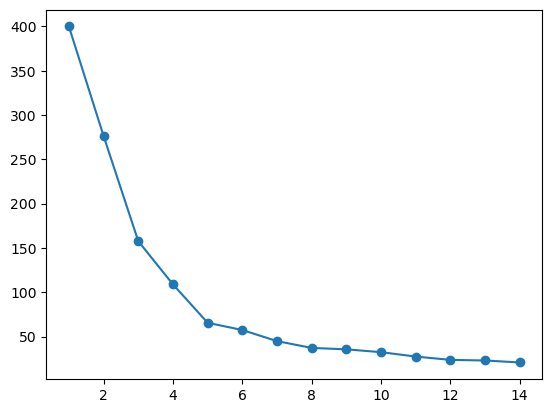

In [75]:
plt.plot(k_value,wcss,marker="o")

In [82]:
kmeans = KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [88]:
df["cluster"] = kmeans.fit_predict(X_scaler)

In [90]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

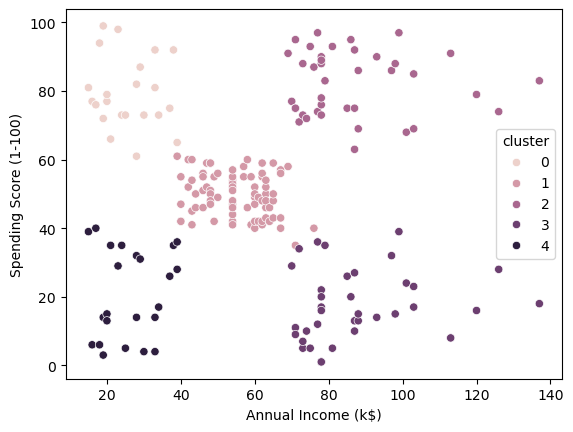

In [92]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue="cluster")

In [94]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,df["cluster"])

In [96]:
score

0.5532176107575425